In [2]:
# Only if not installed yet!
#!python3 -m pip install correctionlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 4.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.12.0
    Uninstalling Pygments-2.12.0:
      Successfully uninstalled Pygments-2.12.0

[notice] A new release of pip available: 22.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import matplotlib.pylab as plt
import numpy as np
import correctionlib

In [4]:
signal = np.genfromtxt('output_signal_22BAB5D2-9E3F-E440-AB30-AE6DBFDF6C83.csv', delimiter=',', names=True, dtype=float)

In [5]:
muon_pt = signal['mu_pt']
muon_abseta = signal['mu_abseta']
genWeight = signal['weight']

In [7]:
!xrdcp root://eospublic.cern.ch//eos/opendata/cms/upload/jsonpog-integration-2016post.tar .

[10.01MB/10.01MB][100%][==================================================][2.502MB/s]  


In [8]:
!tar -xf jsonpog-integration-2016post.tar

In [9]:
import gzip
with gzip.open("POG/MUO/2016postVFP_UL/muon_Z.json.gz",'rt') as file:
    data = file.read().strip()
    evaluator = correctionlib._core.CorrectionSet.from_string(data)

In [10]:
tightIDSF = evaluator["NUM_TightID_DEN_TrackerMuons"]

In [11]:
leadmuon_sf = [tightIDSF.evaluate(eta,pt,"nominal") for pt,eta in zip(muon_pt,muon_abseta)]

In [12]:
leadmuon_sfup = [tightIDSF.evaluate(eta,pt,"systup") for pt,eta in zip(muon_pt,muon_abseta)]
leadmuon_sfdn = [tightIDSF.evaluate(eta,pt,"systdown") for pt,eta in zip(muon_pt,muon_abseta)]

In [13]:
print(leadmuon_sf[0:10])
print(leadmuon_sfup[0:10])
print(leadmuon_sfdn[0:10])

[0.9846264481111426, 0.9846264481111426, 0.9846264481111426, 0.9846264481111426, 0.9904946666670156, 0.9904946666670156, 0.9846264481111426, 0.9846264481111426, 0.9904946666670156, 0.9846264481111426]
[0.987125002975192, 0.987125002975192, 0.987125002975192, 0.987125002975192, 0.993718633147916, 0.993718633147916, 0.987125002975192, 0.987125002975192, 0.993718633147916, 0.987125002975192]
[0.9821278932470932, 0.9821278932470932, 0.9821278932470932, 0.9821278932470932, 0.9872707001861148, 0.9872707001861148, 0.9821278932470932, 0.9821278932470932, 0.9872707001861148, 0.9821278932470932]


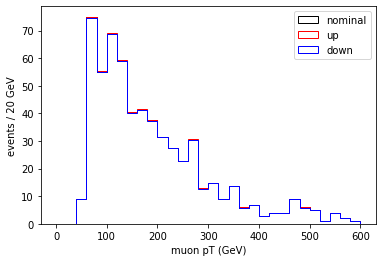

In [21]:
plt.hist(muon_pt,bins=30,range=(0,600),weights=genWeight*leadmuon_sf,histtype="step",color="k",label="nominal")
plt.hist(muon_pt,bins=30,range=(0,600),weights=genWeight*leadmuon_sfup,histtype="step",color="r",label="up")
plt.hist(muon_pt,bins=30,range=(0,600),weights=genWeight*leadmuon_sfdn,histtype="step",color="b",label="down")
plt.legend()
plt.xlabel('muon pT (GeV)')
plt.ylabel('events / 20 GeV')
plt.show()